In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data=pd.read_csv("dataset.csv")

In [15]:
data.shape

(197428, 14)

In [16]:
data.describe()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,196441.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000
mean,2.978706,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065
std,1.524867,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830
min,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000
25%,2.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000
50%,3.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000
75%,4.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000
max,6.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000


# features total_onshift_partners, total_busy_partners and total_busy_partners has negative values.
# Since it doesn't make sense we will remove from our data
# min_item_price negative can be considered as returns/refund

In [17]:
data=data[
    ((data['total_busy_partners'] >= 0) | (data['total_busy_partners'].isnull())) &
    ((data['total_onshift_partners'] >= 0) | (data['total_onshift_partners'].isnull())) &
    ((data['total_outstanding_orders'] >= 0) | (data['total_outstanding_orders'].isnull()))
]

In [18]:
data.shape

(197347, 14)

In [19]:
data.isnull().sum()

market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4758
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

In [20]:
data.reset_index(drop=True,inplace=True)

In [21]:
data.shape

(197347, 14)

# Let's check the data type

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197347 entries, 0 to 197346
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196360 non-null  float64
 1   created_at                197347 non-null  object 
 2   actual_delivery_time      197340 non-null  object 
 3   store_id                  197347 non-null  object 
 4   store_primary_category    192589 non-null  object 
 5   order_protocol            196352 non-null  float64
 6   total_items               197347 non-null  int64  
 7   subtotal                  197347 non-null  int64  
 8   num_distinct_items        197347 non-null  int64  
 9   min_item_price            197347 non-null  int64  
 10  max_item_price            197347 non-null  int64  
 11  total_onshift_partners    181085 non-null  float64
 12  total_busy_partners       181085 non-null  float64
 13  total_outstanding_orders  181085 non-null  f

# Percentage 0f Null Values in the record

In [23]:
(data.isnull().sum()/data.shape[0])*100

market_id                   0.500134
created_at                  0.000000
actual_delivery_time        0.003547
store_id                    0.000000
store_primary_category      2.410982
order_protocol              0.504188
total_items                 0.000000
subtotal                    0.000000
num_distinct_items          0.000000
min_item_price              0.000000
max_item_price              0.000000
total_onshift_partners      8.240308
total_busy_partners         8.240308
total_outstanding_orders    8.240308
dtype: float64

# Since less than 1% data missing in target variable, we will remove the data from the dataset

In [24]:
data.dropna(subset=['actual_delivery_time'],ignore_index=True,inplace=True)

In [25]:
(data.isnull().sum()/data.shape[0])*100

market_id                   0.500152
created_at                  0.000000
actual_delivery_time        0.000000
store_id                    0.000000
store_primary_category      2.411067
order_protocol              0.504206
total_items                 0.000000
subtotal                    0.000000
num_distinct_items          0.000000
min_item_price              0.000000
max_item_price              0.000000
total_onshift_partners      8.240600
total_busy_partners         8.240600
total_outstanding_orders    8.240600
dtype: float64

# Datatype changes

In [26]:
data['created_at']=pd.to_datetime(data['created_at'])
data['actual_delivery_time']=pd.to_datetime(data['actual_delivery_time'])
data['order_protocol']=data['order_protocol'].astype('category')
data['market_id']=data['market_id'].astype('category')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197340 entries, 0 to 197339
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 196353 non-null  category      
 1   created_at                197340 non-null  datetime64[ns]
 2   actual_delivery_time      197340 non-null  datetime64[ns]
 3   store_id                  197340 non-null  object        
 4   store_primary_category    192582 non-null  object        
 5   order_protocol            196345 non-null  category      
 6   total_items               197340 non-null  int64         
 7   subtotal                  197340 non-null  int64         
 8   num_distinct_items        197340 non-null  int64         
 9   min_item_price            197340 non-null  int64         
 10  max_item_price            197340 non-null  int64         
 11  total_onshift_partners    181078 non-null  float64       
 12  to

In [28]:
data['delivery_time']=(data['actual_delivery_time']-data['created_at'])/pd.Timedelta(minutes=1)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197340 entries, 0 to 197339
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 196353 non-null  category      
 1   created_at                197340 non-null  datetime64[ns]
 2   actual_delivery_time      197340 non-null  datetime64[ns]
 3   store_id                  197340 non-null  object        
 4   store_primary_category    192582 non-null  object        
 5   order_protocol            196345 non-null  category      
 6   total_items               197340 non-null  int64         
 7   subtotal                  197340 non-null  int64         
 8   num_distinct_items        197340 non-null  int64         
 9   min_item_price            197340 non-null  int64         
 10  max_item_price            197340 non-null  int64         
 11  total_onshift_partners    181078 non-null  float64       
 12  to

In [30]:
data['delivery_time'].describe()

count    197340.000000
mean         48.469872
std         320.559004
min           1.683333
25%          35.066667
50%          44.333333
75%          56.350000
max      141947.650000
Name: delivery_time, dtype: float64

# It seems like we have outliers in the delivery_time information.

# Creating New Features for Better Analysis

In [31]:
data['created_day']=data['created_at'].dt.day

In [32]:
data['created_yr']=data['created_at'].dt.year

In [33]:
data['created_mth']=data['created_at'].dt.month

In [34]:
data['created_hr']=data['created_at'].dt.hour

In [35]:
def time_segment(hr):
    if hr<9:
        return "Early Morning"
    elif (hr>=9) & (hr<12):
        return "Morning"
    elif (hr>=12) & (hr<17):
        return "Afternoon"
    elif (hr>=17) & (hr<20):
        return "Evening"
    else:
        return "Night"

In [36]:
data['created_period']=data['created_hr'].apply(time_segment)

In [37]:
data.head(2)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time,created_day,created_yr,created_mth,created_hr,created_period
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333,6,2015,2,22,Night
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667,10,2015,2,21,Night


# EDA

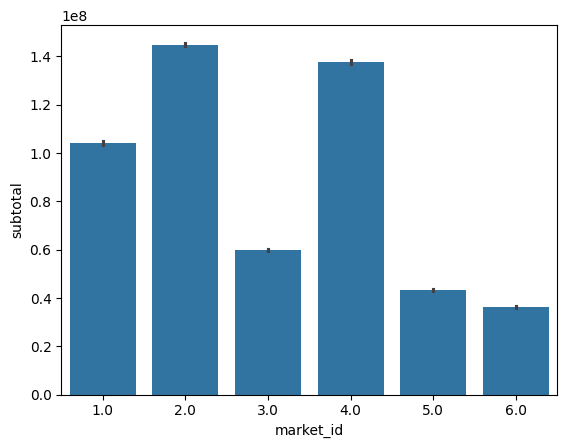

In [38]:
sns.barplot(data=data,x='market_id',y='subtotal',estimator='sum')
plt.show()

# Market ID 2 seems to be the major market

# Avg Detlivery time based on market

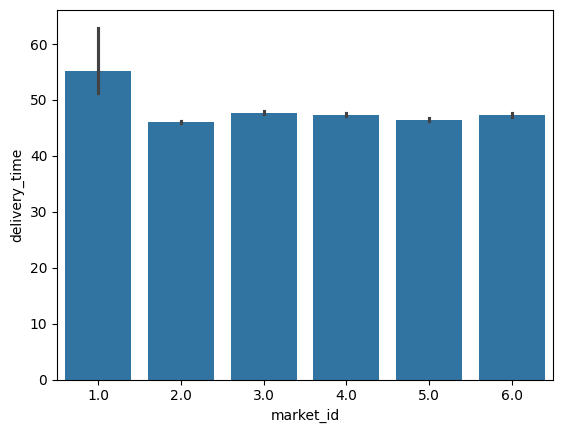

In [39]:
sns.barplot(data=data,x='market_id',y='delivery_time')
plt.show()

# Delivery time for all the market seems to be almost same except for the market id 1
# Market 2 seems to be the best delivering the item

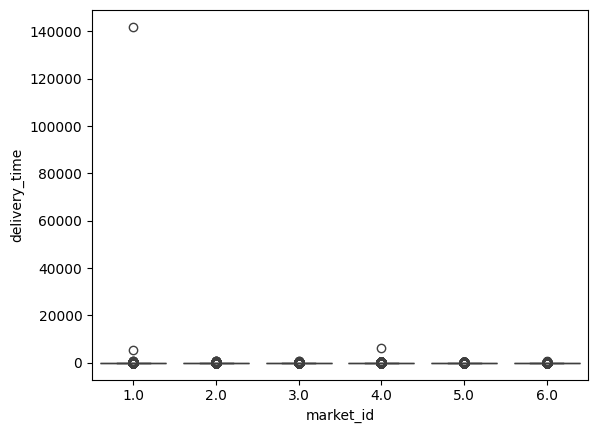

In [40]:
sns.boxplot(data=data,x='market_id',y='delivery_time')
plt.show()

# It seems like we have a very huge outlier in delivery time, which is skewing the data to a major extend

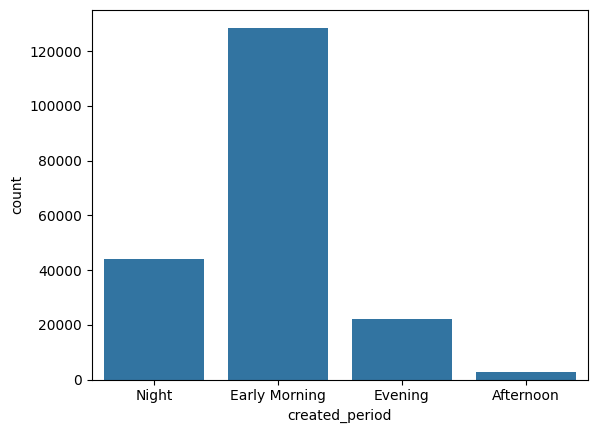

In [41]:
sns.countplot(data=data,x='created_period')
plt.show()

# Most orders are received in Early Morning Time and in night

In [42]:
data['created_dt']=data['created_at'].dt.date

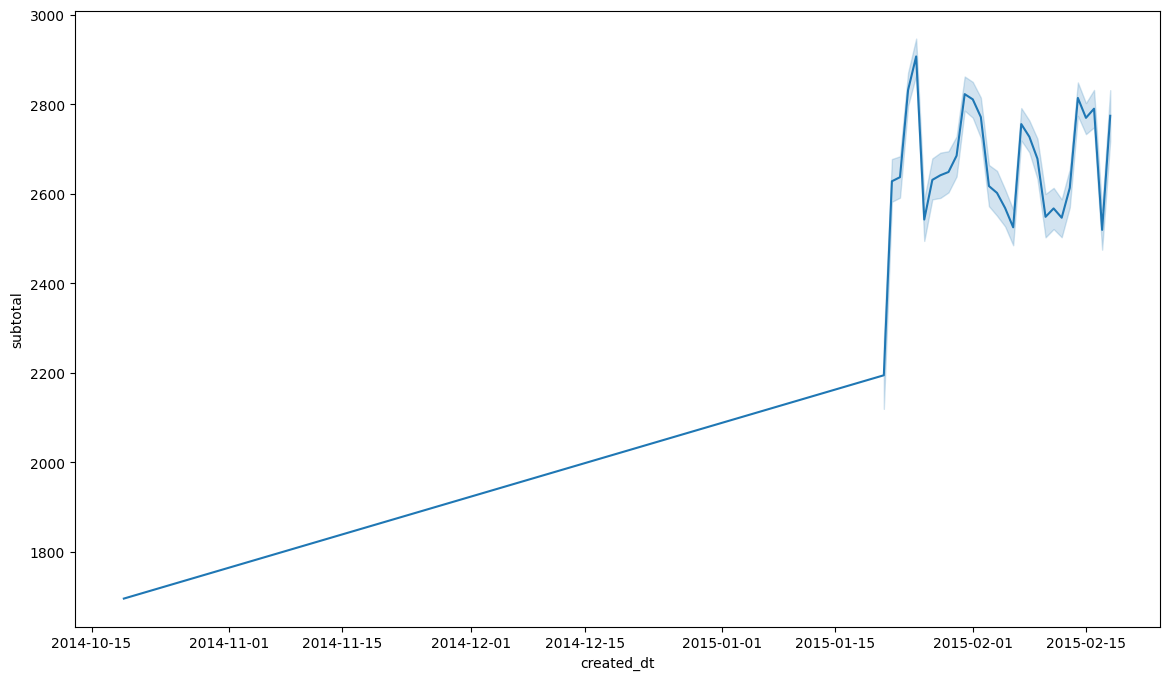

In [43]:
plt.figure(figsize=(14,8))
sns.lineplot(data=data,x='created_dt',y='subtotal')
plt.show()

# It seems like we done have completed data in 2014

## Beacuse of the we don't see any fultuations in 2014 record

## so it is better to remove 2014 record from the data

In [44]:
data1=data[data['created_yr']!=2014]

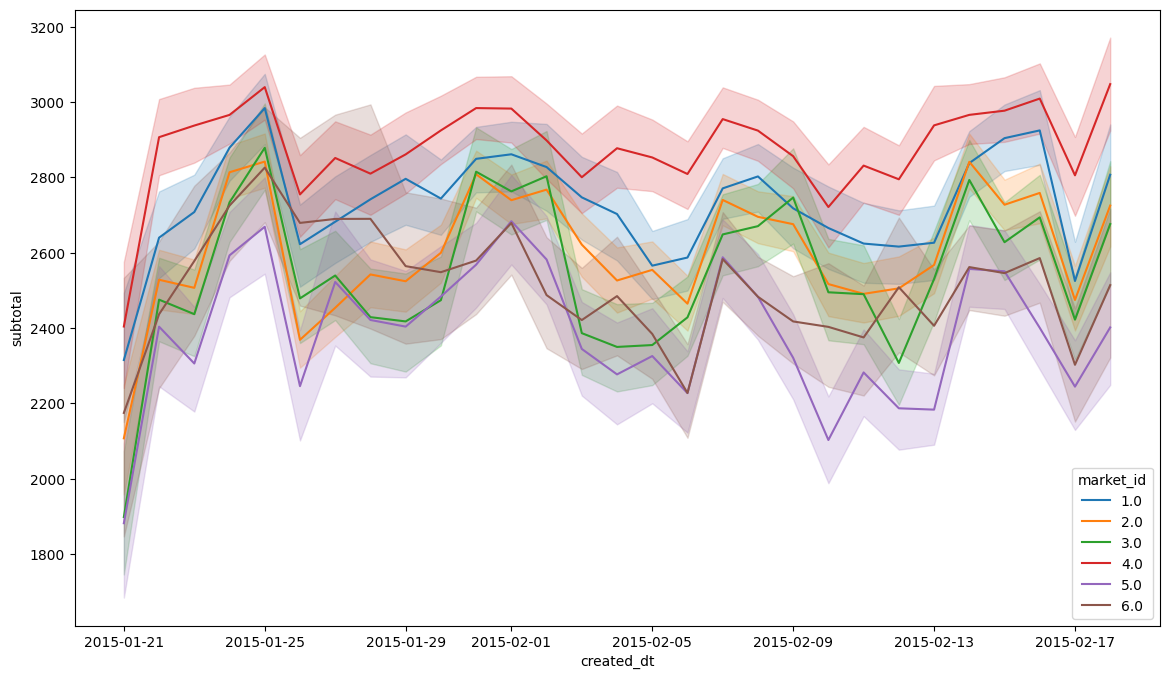

In [45]:
plt.figure(figsize=(14,8))
sns.lineplot(data=data1,x='created_dt',y='subtotal',hue='market_id')
plt.show()

# Almost all the market has the similar pattern of business. analysis based on the two months of record

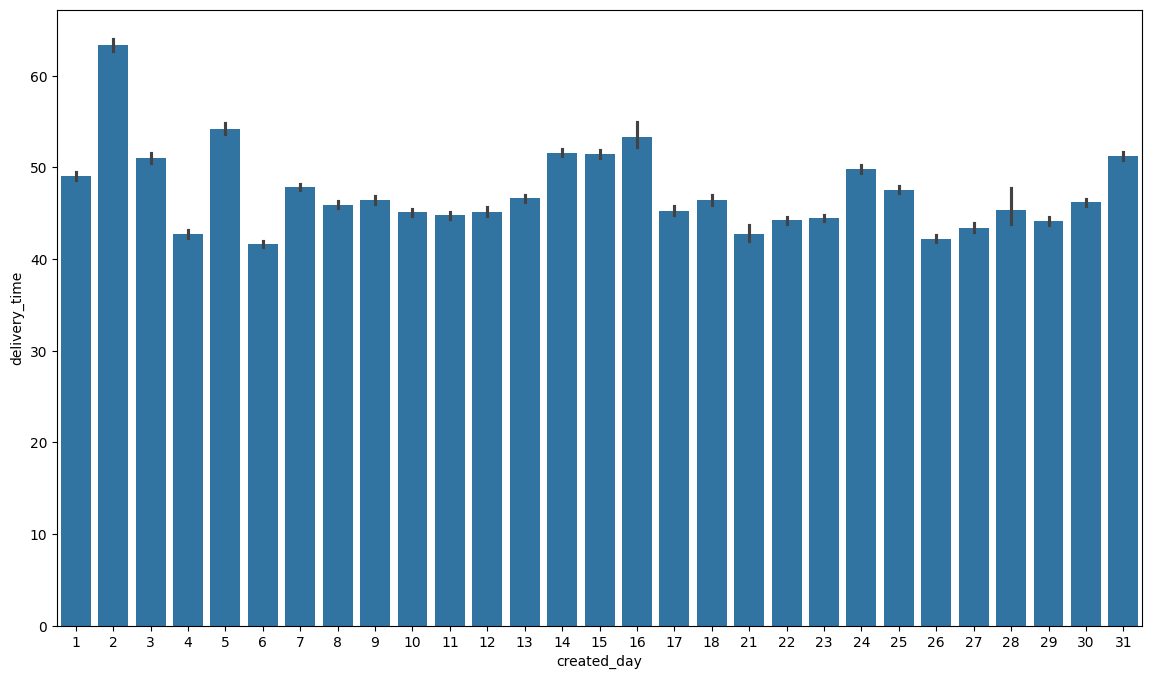

In [46]:
plt.figure(figsize=(14,8))
sns.barplot(data=data1,x='created_day',y='delivery_time',estimator='mean')
plt.show()

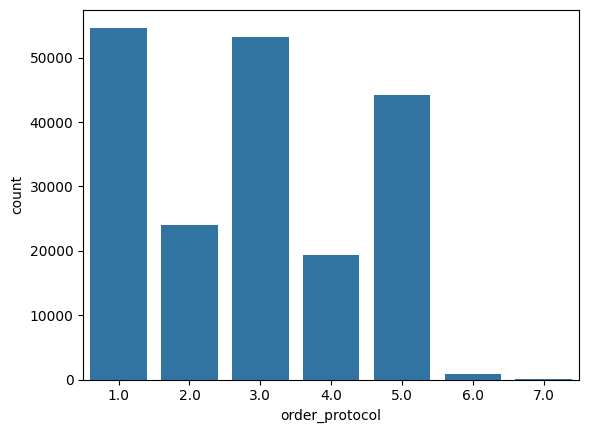

In [47]:
sns.countplot(data=data1,x='order_protocol')
plt.show()

# Maximum orders to stores are received via channel 1

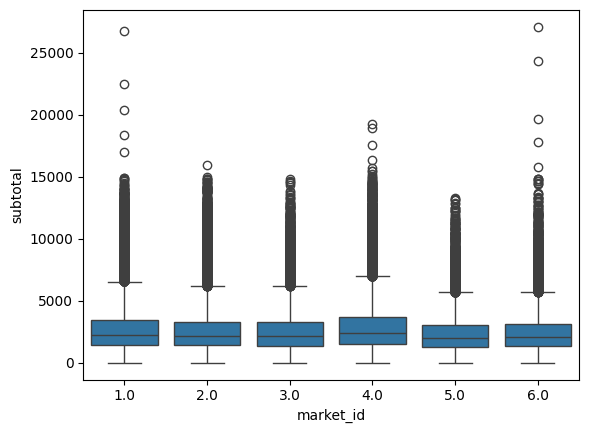

In [48]:
sns.boxplot(data=data1,y='subtotal',x='market_id')
plt.show()

# Subtotal has huge price variation across all stores

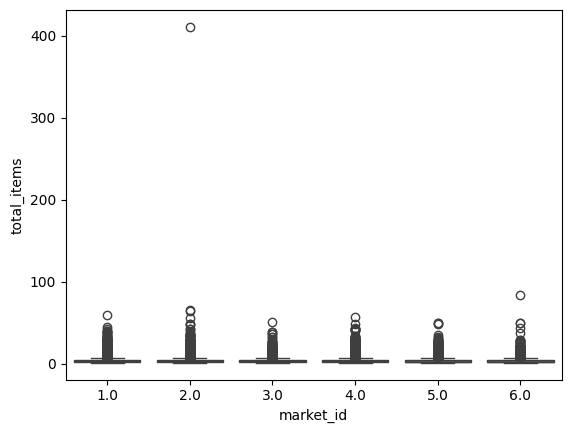

In [49]:
sns.boxplot(data=data1,y='total_items',x='market_id')
plt.show()

# The value above 400 seems to be a data entry error. we will fix the issue when handle outliers

In [50]:
data1=data1[data1['total_items']<400]

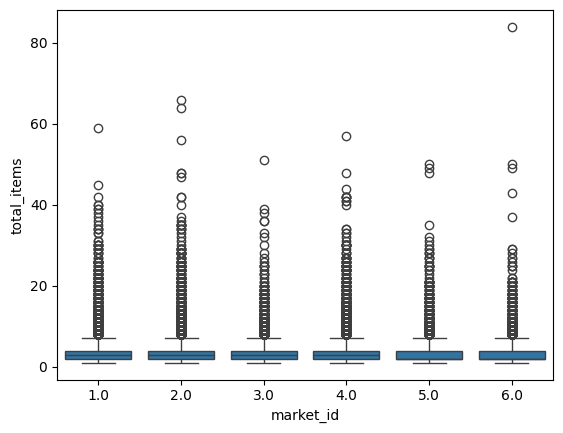

In [51]:
sns.boxplot(data=data1,y='total_items',x='market_id')
plt.show()

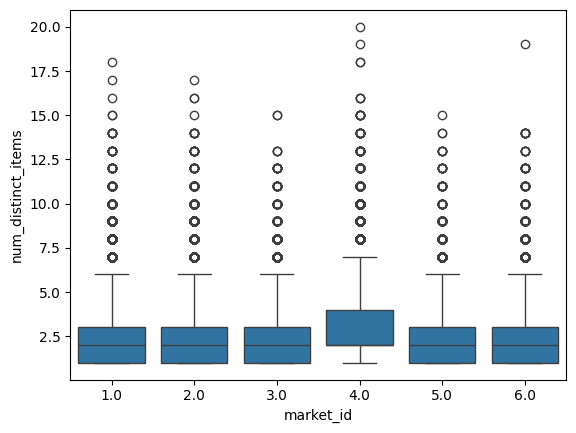

In [52]:
sns.boxplot(data=data1,y='num_distinct_items',x='market_id')
plt.show()

# we need to compare it with the subtotal to see whether the pricing are okay

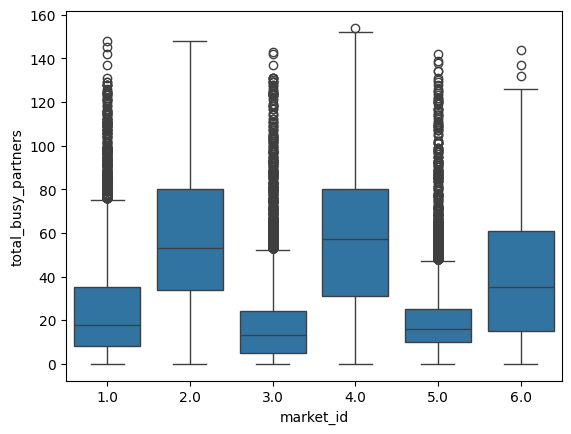

In [53]:
sns.boxplot(data=data1,y='total_busy_partners',x='market_id')
plt.show()

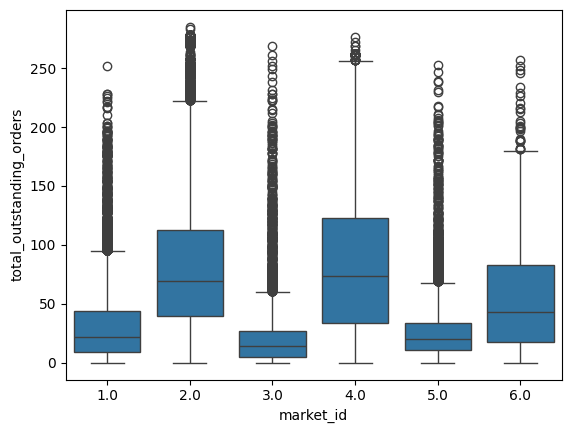

In [54]:
sns.boxplot(data=data1,y='total_outstanding_orders',x='market_id')
plt.show()

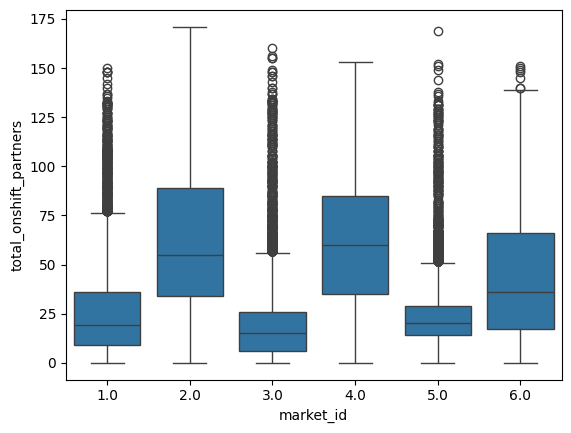

In [55]:
sns.boxplot(data=data1,y='total_onshift_partners',x='market_id')
plt.show()

# It seems like the distribution for the total_onshift_partners,total_outstanding_orders and total_busy_partners are almost same at market level id

# Missing Value treatment

In [56]:
data1.reset_index(drop='first',inplace=True)

# Market_id greatly depends on store_id & store_primary_category
# we will impute based on these information

In [57]:
def fillna_obj(df,a,b,c):
    fill_val=df.groupby(by=[a,b])[c].transform(lambda x: x.mode()[0] if not x.mode().empty else None)
    df[c]=df[c].fillna(fill_val)
    fill_val1=df.groupby(by=[a])[c].transform(lambda x: x.mode()[0] if not x.mode().empty else None)
    df[c]=df[c].fillna(fill_val1)
    fill_val2=df.groupby(by=[b])[c].transform(lambda x: x.mode()[0] if not x.mode().empty else None)
    df[c]=df[c].fillna(fill_val2)
    df[c]=df[c].fillna(df[c].mode()[0])
    return df

def fillna_pro(df,a,b,c,d):
    fill_val=df.groupby(by=[a,b,c])[d].transform(lambda x: x.mode()[0] if not x.mode().empty else None)
    df[d]=df[d].fillna(fill_val)
    fill_val1=df.groupby(by=[a,b])[d].transform(lambda x: x.mode()[0] if not x.mode().empty else None)
    df[d]=df[d].fillna(fill_val1)
    fill_val2=df.groupby(by=[a])[d].transform(lambda x: x.mode()[0] if not x.mode().empty else None)
    df[d]=df[d].fillna(fill_val2)
    df[d]=df[d].fillna(df[d].mode()[0])
    return df

In [58]:
data2=fillna_obj(data1,'store_id','store_primary_category','market_id')
data3=fillna_obj(data1,'store_id','market_id','store_primary_category')
data4=fillna_pro(data3,'market_id','store_id','store_primary_category','order_protocol')

C:\Users\Arun\AppData\Local\Temp\ipykernel_888\1037993540.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fill_val=df.groupby(by=[a,b])[c].transform(lambda x: x.mode()[0] if not x.mode().empty else None)
C:\Users\Arun\AppData\Local\Temp\ipykernel_888\1037993540.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fill_val2=df.groupby(by=[b])[c].transform(lambda x: x.mode()[0] if not x.mode().empty else None)
C:\Users\Arun\AppData\Local\Temp\ipykernel_888\1037993540.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=Fals

In [59]:
data4.isnull().sum()

market_id                       0
created_at                      0
actual_delivery_time            0
store_id                        0
store_primary_category          0
order_protocol                  0
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16261
total_busy_partners         16261
total_outstanding_orders    16261
delivery_time                   0
created_day                     0
created_yr                      0
created_mth                     0
created_hr                      0
created_period                  0
created_dt                      0
dtype: int64

In [60]:
data4[data4['total_onshift_partners'].isnull()][['total_onshift_partners','total_busy_partners','total_outstanding_orders']].isnull().sum()

total_onshift_partners      16261
total_busy_partners         16261
total_outstanding_orders    16261
dtype: int64

# From output is clearly evident that, if total on shift partners is missing, we don't have data for busy partner and outstanding orders

# Before filling the null values, we will split the data into train and test

In [61]:
from sklearn.model_selection import train_test_split

# Before spliting the data, we will select the required columns for modelling

In [62]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197338 entries, 0 to 197337
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 197338 non-null  category      
 1   created_at                197338 non-null  datetime64[ns]
 2   actual_delivery_time      197338 non-null  datetime64[ns]
 3   store_id                  197338 non-null  object        
 4   store_primary_category    197338 non-null  object        
 5   order_protocol            197338 non-null  category      
 6   total_items               197338 non-null  int64         
 7   subtotal                  197338 non-null  int64         
 8   num_distinct_items        197338 non-null  int64         
 9   min_item_price            197338 non-null  int64         
 10  max_item_price            197338 non-null  int64         
 11  total_onshift_partners    181077 non-null  float64       
 12  to

In [63]:
data4.head(3)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,...,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time,created_day,created_yr,created_mth,created_hr,created_period,created_dt
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,...,33.0,14.0,21.0,62.983333,6,2015,2,22,Night,2015-02-06
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,...,1.0,2.0,2.0,67.066667,10,2015,2,21,Night,2015-02-10
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,indian,1.0,1,1900,1,1900,...,1.0,0.0,0.0,29.683333,22,2015,1,20,Night,2015-01-22


In [64]:
final_data=data4[['market_id','store_primary_category','order_protocol','total_items','subtotal','num_distinct_items','min_item_price','total_onshift_partners',\
'total_busy_partners','total_outstanding_orders','delivery_time','created_day','created_mth','created_period']]

In [65]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197338 entries, 0 to 197337
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 197338 non-null  category
 1   store_primary_category    197338 non-null  object  
 2   order_protocol            197338 non-null  category
 3   total_items               197338 non-null  int64   
 4   subtotal                  197338 non-null  int64   
 5   num_distinct_items        197338 non-null  int64   
 6   min_item_price            197338 non-null  int64   
 7   total_onshift_partners    181077 non-null  float64 
 8   total_busy_partners       181077 non-null  float64 
 9   total_outstanding_orders  181077 non-null  float64 
 10  delivery_time             197338 non-null  float64 
 11  created_day               197338 non-null  int32   
 12  created_mth               197338 non-null  int32   
 13  created_period            197

# Outlier Fixing

# Before fix the outlier for the features, we will fix the outlier for the delivery time -> Target value

In [66]:
final_data['delivery_time'].describe()

count    197338.000000
mean         47.750793
std          26.890707
min           1.683333
25%          35.066667
50%          44.333333
75%          56.350000
max        6231.316667
Name: delivery_time, dtype: float64

# Above Information it is very clear that, we have some outliers in the delivery time data

<Axes: xlabel='delivery_time', ylabel='Density'>

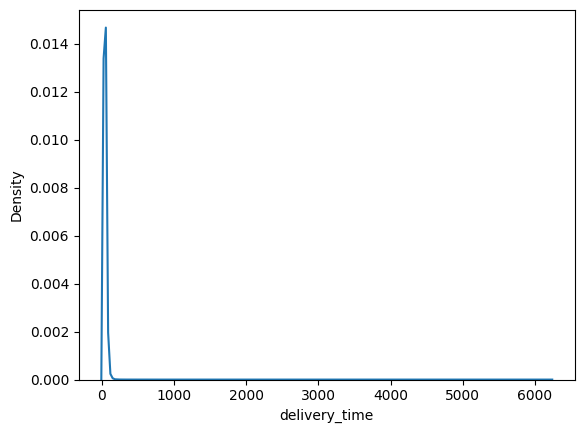

In [67]:
sns.kdeplot(final_data['delivery_time'])

# Kde plot confirms the same

# We will see the features which logically causes delay in order delivery
# 1. Total items
# 2.Num of distinct items
# 3.total on shift partners
# 4.total busy partners
# 5.Total outstanding orders

# we will split the data which has delivery time greater than 99 percentile and compare the data dependent features with whole data to check is there any change in pattern which cause this delay

In [68]:
temp=final_data[(final_data['delivery_time']>np.percentile(final_data['delivery_time'],99)) | (final_data['delivery_time']<np.percentile(final_data['delivery_time'],1))]

In [69]:
final_data[['total_items','subtotal','num_distinct_items','min_item_price','total_onshift_partners','total_busy_partners','total_outstanding_orders']].describe()

,total_items,subtotal,num_distinct_items,min_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,197338.000000,197338.000000,197338.000000,197338.000000,181077.000000,181077.000000,181077.000000
mean,3.194443,2682.379228,2.670864,686.190627,44.824677,41.755557,58.073190
std,2.503862,1823.201664,1.630268,521.983777,34.523290,32.142517,52.658393
min,1.000000,0.000000,1.000000,-86.000000,0.000000,0.000000,0.000000
25%,2.000000,1400.000000,1.000000,299.000000,17.000000,15.000000,17.000000
50%,3.000000,2200.000000,2.000000,595.000000,37.000000,34.000000,41.000000
75%,4.000000,3395.000000,3.000000,949.000000,65.000000,62.000000,85.000000
max,84.000000,27100.000000,20.000000,14700.000000,171.000000,154.000000,285.000000


In [70]:
temp[['total_items','subtotal','num_distinct_items','min_item_price','total_onshift_partners','total_busy_partners','total_outstanding_orders']].describe()

,total_items,subtotal,num_distinct_items,min_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,3946.000000,3946.000000,3946.000000,3946.000000,3617.000000,3617.000000,3617.000000
mean,3.041814,2413.496452,2.482007,677.182463,34.307161,32.391208,44.959082
std,2.802231,2003.224583,1.750699,533.350650,28.036578,27.412156,46.357081
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1100.000000,1.000000,295.000000,13.000000,11.000000,13.000000
50%,2.000000,1789.000000,2.000000,595.000000,27.000000,24.000000,30.000000
75%,4.000000,3000.000000,3.000000,925.000000,49.000000,47.000000,60.000000
max,47.000000,27100.000000,19.000000,6889.000000,151.000000,138.000000,276.000000


# Above data desribtion confirms there is no pattern which cause the deviation. so it is confirmed the data is pure outliers

<Axes: ylabel='Density'>

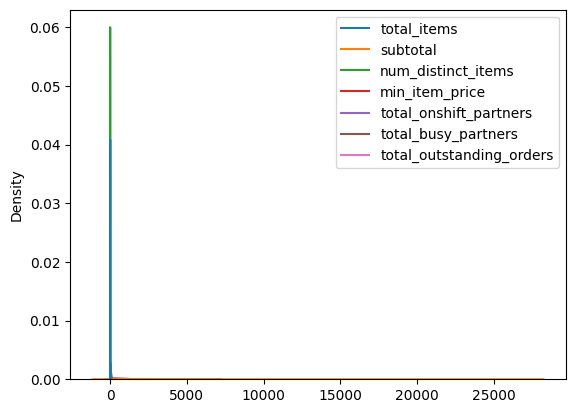

In [71]:
sns.kdeplot(temp[['total_items','subtotal','num_distinct_items','min_item_price','total_onshift_partners','total_busy_partners','total_outstanding_orders']])

<Axes: ylabel='Density'>

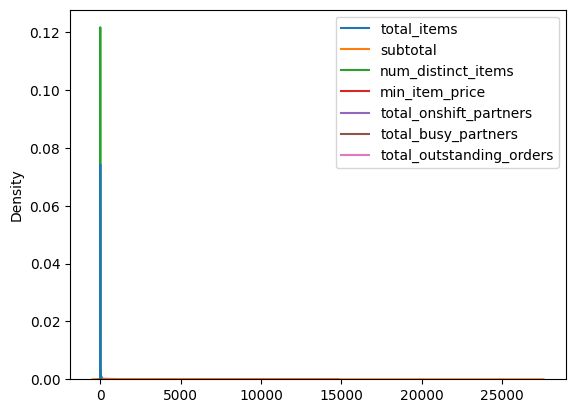

In [72]:
sns.kdeplot(final_data[['total_items','subtotal','num_distinct_items','min_item_price','total_onshift_partners','total_busy_partners','total_outstanding_orders']])

# The same can be confirmed with KDE plot as well

# We will cap the delivery time value with the median value for the values less than 1 percentile data and 99 percentile value for data more than 99 percentile

In [73]:
p1 = np.percentile(final_data['delivery_time'], 1)
p99 = np.percentile(final_data['delivery_time'], 99)
median = final_data['delivery_time'].median()

In [74]:
final_data['delivery_time']=np.where(final_data['delivery_time'] < p1, median,np.where(final_data['delivery_time'] > p99, p99, final_data['delivery_time']))

C:\Users\Arun\AppData\Local\Temp\ipykernel_888\545627806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['delivery_time']=np.where(final_data['delivery_time'] < p1, median,np.where(final_data['delivery_time'] > p99, p99, final_data['delivery_time']))


<Axes: xlabel='delivery_time', ylabel='Density'>

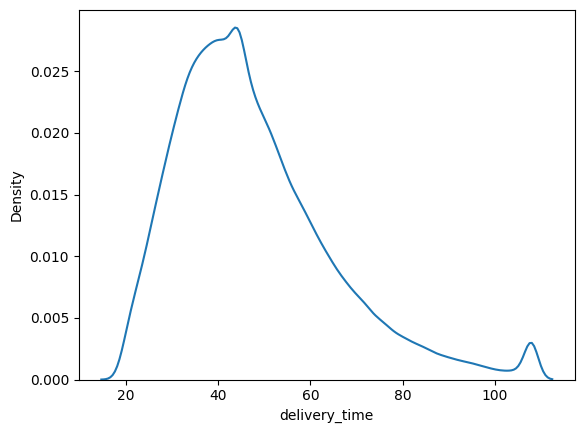

In [75]:
sns.kdeplot(final_data['delivery_time'])

# Now the distribution looks much better

# Lets split the data 

In [76]:
X=final_data[['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'created_day',
       'created_mth', 'created_period']]

In [77]:
final_data.columns

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'delivery_time', 'created_day',
       'created_mth', 'created_period'],
      dtype='object')

In [78]:
y=final_data['delivery_time']

In [79]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [80]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(157870, 13)
(39468, 13)
(157870,)
(39468,)


In [81]:
X_train

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,created_day,created_mth,created_period
66981,2.0,american,5.0,2,1520,2,425,8.0,8.0,10.0,28,1,Evening
100875,4.0,japanese,3.0,5,5275,5,595,77.0,73.0,131.0,16,2,Early Morning
83509,2.0,burger,4.0,2,1084,2,389,121.0,108.0,161.0,30,1,Early Morning
113085,2.0,other,3.0,4,963,3,165,43.0,33.0,49.0,17,2,Evening
95837,6.0,dessert,5.0,3,1050,1,350,NaN,NaN,NaN,27,1,Early Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140312,1.0,vegetarian,1.0,2,2590,2,1295,17.0,17.0,32.0,22,1,Early Morning
164783,5.0,mexican,1.0,3,2300,3,675,24.0,40.0,18.0,25,1,Night
80408,6.0,japanese,2.0,2,1475,2,500,NaN,NaN,NaN,5,2,Night
94413,1.0,pizza,6.0,1,1545,1,806,20.0,22.0,9.0,7,2,Night


# We need to encode store primary category and created period
# We need to check the outliers for the numerical columns and fill the null values before we initiate the modeling activity

In [82]:
encode_data=pd.DataFrame(X_train[['market_id','store_primary_category']].value_counts(normalize=True)).reset_index()

In [83]:
X_train=pd.merge(X_train,encode_data,how='left',on=['market_id','store_primary_category'])

In [84]:
X_train.drop(columns='store_primary_category',inplace=True)

In [85]:
X_train['created_period'].unique()

array(['Evening', 'Early Morning', 'Night', 'Afternoon'], dtype=object)

In [86]:
dummies=pd.get_dummies(X_train['created_period'],dtype=int)

In [87]:
X_train=pd.concat([X_train,dummies],axis=1)

In [88]:
X_train.drop(columns='created_period',inplace=True)

In [89]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157870 entries, 0 to 157869
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 157870 non-null  category
 1   order_protocol            157870 non-null  category
 2   total_items               157870 non-null  int64   
 3   subtotal                  157870 non-null  int64   
 4   num_distinct_items        157870 non-null  int64   
 5   min_item_price            157870 non-null  int64   
 6   total_onshift_partners    144909 non-null  float64 
 7   total_busy_partners       144909 non-null  float64 
 8   total_outstanding_orders  144909 non-null  float64 
 9   created_day               157870 non-null  int32   
 10  created_mth               157870 non-null  int32   
 11  proportion                157870 non-null  float64 
 12  Afternoon                 157870 non-null  int32   
 13  Early Morning             157

# All the columns are encode

In [90]:
data_lof=X_train[['total_items','subtotal','num_distinct_items','min_item_price','market_id']].dropna()

# Outlier detection

# Scaling the data

In [91]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [92]:
lof_scale=scale.fit_transform(data_lof)

In [93]:
lof_scale

array([[-0.47859027, -0.63776905, -0.41204756, -0.49979947, -0.64037631],
       [ 0.72404957,  1.42028956,  1.42945776, -0.17445329,  0.67227165],
       [-0.47859027, -0.87673404, -0.41204756, -0.56869631, -0.64037631],
       ...,
       [-0.47859027, -0.66243287, -0.41204756, -0.35626439,  1.98491961],
       [-0.87947022, -0.62406693, -1.02588266,  0.22935874, -1.29670029],
       [-0.87947022, -0.59392226, -1.02588266,  0.98339636, -1.29670029]])

In [94]:
from sklearn.neighbors import LocalOutlierFactor

In [95]:
clf=LocalOutlierFactor(contamination=0.1,n_neighbors=100)

In [96]:
data_lof['outlier?']=clf.fit_predict(lof_scale)

C:\Users\Arun\anaconda3\envs\Tensor_flow\lib\site-packages\sklearn\neighbors\_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


In [97]:
data_lof

,total_items,subtotal,num_distinct_items,min_item_price,market_id,outlier?
0,2,1520,2,425,2.0,1
1,5,5275,5,595,4.0,1
2,2,1084,2,389,2.0,1
3,4,963,3,165,2.0,1
4,3,1050,1,350,6.0,1
...,...,...,...,...,...,...
157865,2,2590,2,1295,1.0,1
157866,3,2300,3,675,5.0,1
157867,2,1475,2,500,6.0,1
157868,1,1545,1,806,1.0,1


In [98]:
data_lof[data_lof['outlier?']==-1]

,total_items,subtotal,num_distinct_items,min_item_price,market_id,outlier?
33,1,1570,1,1425,2.0,-1
37,3,1169,3,55,3.0,-1
64,1,1000,1,1000,2.0,-1
67,2,1930,2,935,2.0,-1
70,5,3435,4,25,2.0,-1
...,...,...,...,...,...,...
157823,1,1350,1,1350,2.0,-1
157832,3,450,1,150,4.0,-1
157837,7,1883,1,269,1.0,-1
157840,1,1525,1,1525,2.0,-1


In [99]:
data_lof[data_lof['outlier?']==1]

,total_items,subtotal,num_distinct_items,min_item_price,market_id,outlier?
0,2,1520,2,425,2.0,1
1,5,5275,5,595,4.0,1
2,2,1084,2,389,2.0,1
3,4,963,3,165,2.0,1
4,3,1050,1,350,6.0,1
...,...,...,...,...,...,...
157865,2,2590,2,1295,1.0,1
157866,3,2300,3,675,5.0,1
157867,2,1475,2,500,6.0,1
157868,1,1545,1,806,1.0,1


In [100]:
data_lof[data_lof['outlier?']!=-1].describe()

,total_items,subtotal,num_distinct_items,min_item_price,outlier?
count,142083.000000,142083.000000,142083.000000,142083.000000,142083.0
mean,3.284362,2742.718305,2.775371,664.522962,1.0
std,2.370385,1802.613282,1.618180,496.361088,0.0
min,1.000000,0.000000,1.000000,-52.000000,1.0
25%,2.000000,1490.500000,2.000000,299.000000,1.0
50%,3.000000,2290.000000,2.000000,563.000000,1.0
75%,4.000000,3450.000000,4.000000,899.000000,1.0
max,34.000000,14920.000000,15.000000,5295.000000,1.0


In [101]:
data_lof[data_lof['outlier?']==-1].describe()

,total_items,subtotal,num_distinct_items,min_item_price,outlier?
count,15787.000000,15787.000000,15787.000000,15787.000000,15787.0
mean,2.379236,2151.854881,1.734338,880.847279,-1.0
std,3.304709,1931.523490,1.413537,686.174195,0.0
min,1.000000,0.000000,1.000000,-86.000000,-1.0
25%,1.000000,1050.000000,1.000000,395.000000,-1.0
50%,1.000000,1500.000000,1.000000,875.000000,-1.0
75%,3.000000,2650.000000,2.000000,1199.000000,-1.0
max,84.000000,27100.000000,20.000000,14700.000000,-1.0


In [102]:
X_train=pd.merge(X_train,data_lof['outlier?'],how='left',left_index=True,right_index=True)

In [103]:
X_train.shape

(157870, 17)

In [104]:
X_train

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,created_day,created_mth,proportion,Afternoon,Early Morning,Evening,Night,outlier?
0,2.0,5.0,2,1520,2,425,8.0,8.0,10.0,28,1,0.029714,0,0,1,0,1
1,4.0,3.0,5,5275,5,595,77.0,73.0,131.0,16,2,0.012067,0,1,0,0,1
2,2.0,4.0,2,1084,2,389,121.0,108.0,161.0,30,1,0.017571,0,1,0,0,1
3,2.0,3.0,4,963,3,165,43.0,33.0,49.0,17,2,0.005783,0,0,1,0,1
4,6.0,5.0,3,1050,1,350,NaN,NaN,NaN,27,1,0.003066,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157865,1.0,1.0,2,2590,2,1295,17.0,17.0,32.0,22,1,0.000925,0,1,0,0,1
157866,5.0,1.0,3,2300,3,675,24.0,40.0,18.0,25,1,0.005771,0,0,0,1,1
157867,6.0,2.0,2,1475,2,500,NaN,NaN,NaN,5,2,0.004295,0,0,0,1,1
157868,1.0,6.0,1,1545,1,806,20.0,22.0,9.0,7,2,0.020878,0,0,0,1,1


# Outlier Treatment

In [105]:
X_train['total_items']=np.where((X_train['outlier?']==-1) & (X_train['total_items']>np.percentile(X_train['total_items'],95)),np.percentile(X_train['total_items'],95),X_train['total_items'])

In [106]:
X_train['subtotal']=np.where((X_train['outlier?']==-1) & (X_train['subtotal']>np.percentile(X_train['subtotal'],95)),np.percentile(X_train['subtotal'],95),X_train['subtotal'])

In [107]:
X_train['num_distinct_items']=np.where((X_train['outlier?']==-1) & (X_train['num_distinct_items']>np.percentile(X_train['num_distinct_items'],95)),np.percentile(X_train['num_distinct_items'],95),X_train['num_distinct_items'])

In [108]:
X_train['min_item_price']=np.where((X_train['outlier?']==-1) & (X_train['min_item_price']>np.percentile(X_train['min_item_price'],95)),np.percentile(X_train['min_item_price'],95),X_train['min_item_price'])

In [109]:
X_train.rename(columns={'proportion':'store_primary_category'},inplace=True)

In [110]:
data_partner=X_train[['total_onshift_partners','total_busy_partners','total_outstanding_orders','market_id']].dropna()

In [111]:
scale_partner=scale.fit_transform(data_partner)

In [112]:
clf1=LocalOutlierFactor(contamination=0.1,n_neighbors=150)

In [113]:
data_partner['outlier?']=clf1.fit_predict(scale_partner)

C:\Users\Arun\anaconda3\envs\Tensor_flow\lib\site-packages\sklearn\neighbors\_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


In [114]:
X_train=pd.merge(X_train,data_partner['outlier?'],how='left',left_index=True,right_index=True)

In [115]:
X_train['total_onshift_partners']=np.where((X_train['outlier?_y']==-1) & (X_train['total_onshift_partners']>np.percentile(X_train['total_onshift_partners'],95)),np.percentile(X_train['total_onshift_partners'],95),X_train['total_onshift_partners'])

In [116]:
X_train['total_busy_partners']=np.where((X_train['outlier?_y']==-1) & (X_train['total_busy_partners']>np.percentile(X_train['total_busy_partners'],95)),np.percentile(X_train['total_busy_partners'],95),X_train['total_busy_partners'])

In [117]:
X_train['total_outstanding_orders']=np.where((X_train['outlier?_y']==-1) & (X_train['total_outstanding_orders']>np.percentile(X_train['total_outstanding_orders'],95)),np.percentile(X_train['total_outstanding_orders'],95),X_train['total_outstanding_orders'])

In [119]:
X_train.drop(columns=['outlier?_x','outlier?_y'],inplace=True)

In [120]:
X_train.isnull().sum()

market_id                       0
order_protocol                  0
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
total_onshift_partners      12961
total_busy_partners         12961
total_outstanding_orders    12961
created_day                     0
created_mth                     0
store_primary_category          0
Afternoon                       0
Early Morning                   0
Evening                         0
Night                           0
dtype: int64

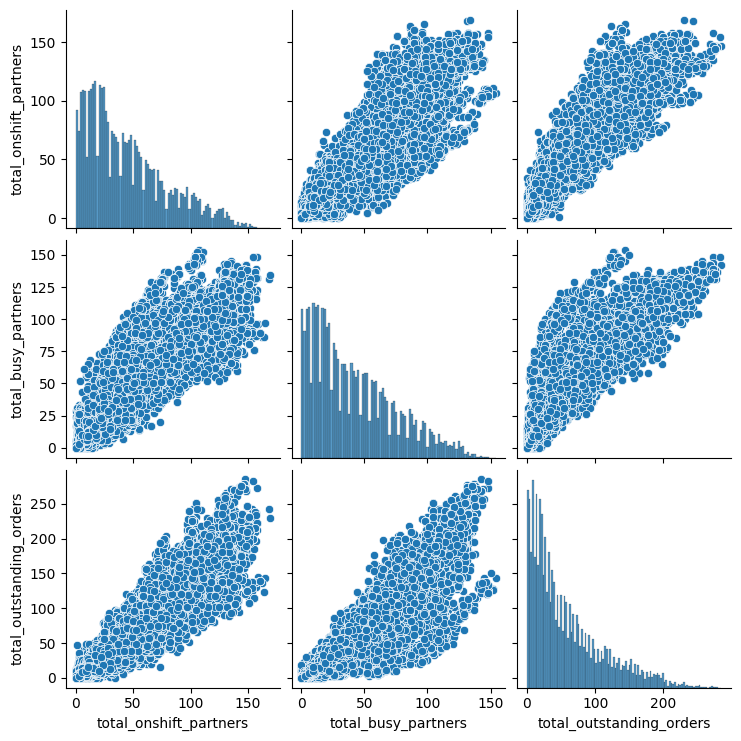

In [123]:
sns.pairplot(data=X_train[['total_onshift_partners','total_busy_partners','total_outstanding_orders']])
plt.show()

# Based on the pair plot we can see there is linear realation between the 'total_onshift_partners','total_busy_partners','total_outstanding_orders'
# So we will use linear regression model to fill the null values

In [135]:
lin_mod=pd.concat([X_train[['total_onshift_partners','total_busy_partners','total_outstanding_orders','market_id']],y_train.reset_index(drop=True)],axis=1)

In [136]:
lin_mod

,total_onshift_partners,total_busy_partners,total_outstanding_orders,market_id,delivery_time
0,8.0,8.0,10.0,2.0,42.316667
1,77.0,73.0,131.0,4.0,75.000000
2,121.0,108.0,161.0,2.0,38.566667
3,43.0,33.0,49.0,2.0,31.616667
4,NaN,NaN,NaN,6.0,37.833333
...,...,...,...,...,...
157865,17.0,17.0,32.0,1.0,58.116667
157866,24.0,40.0,18.0,5.0,45.416667
157867,NaN,NaN,NaN,6.0,27.666667
157868,20.0,22.0,9.0,1.0,27.783333


In [138]:
lin_test=lin_mod[lin_mod['total_onshift_partners'].isnull()]

In [140]:
lin_test.shape

(12961, 5)

In [141]:
lin_data=lin_mod[~lin_mod['total_onshift_partners'].isnull()]

In [142]:
lin_data

,total_onshift_partners,total_busy_partners,total_outstanding_orders,market_id,delivery_time
0,8.0,8.0,10.0,2.0,42.316667
1,77.0,73.0,131.0,4.0,75.000000
2,121.0,108.0,161.0,2.0,38.566667
3,43.0,33.0,49.0,2.0,31.616667
5,127.0,99.0,157.0,2.0,47.466667
...,...,...,...,...,...
157864,11.0,9.0,16.0,5.0,26.400000
157865,17.0,17.0,32.0,1.0,58.116667
157866,24.0,40.0,18.0,5.0,45.416667
157868,20.0,22.0,9.0,1.0,27.783333


# First we will use total_onshift_partners as target variable

In [173]:
onshift_y=lin_data['total_onshift_partners']

In [174]:
onshift_x=lin_data[['total_busy_partners','total_outstanding_orders','market_id','delivery_time']]

In [175]:
onshift_train,onshift_val,onshift_ytrain,onshift_yval=train_test_split(onshift_x,onshift_y,test_size=0.2,random_state=55)

In [179]:
scale1=StandardScaler()

In [180]:
onshift_scale_train=scale1.fit_transform(onshift_train)

In [181]:
onshift_scale_train

array([[ 1.28785501,  1.63862926, -0.56078598,  0.52282753],
       [ 1.22551701,  1.3340292 ,  0.94209764, -0.43392126],
       [-1.01865092, -0.96950879,  0.19065583,  0.24349192],
       ...,
       [-1.04981992, -0.91239628, -0.56078598,  0.02450059],
       [-1.29917191, -1.10277132,  0.19065583, -1.05780322],
       [-0.92514392, -0.85528377,  0.19065583,  0.52185423]])

In [182]:
from sklearn.linear_model import LinearRegression

In [183]:
onshift=LinearRegression()

In [184]:
onshift.fit(onshift_scale_train,onshift_ytrain)

LinearRegression()

In [185]:
onshift.score(onshift_scale_train,onshift_ytrain)

0.9180424983502796

# Training Score of the model is around 91%

In [186]:
onshift_val_scale=scale1.transform(onshift_val)

In [187]:
onshift_yval_pred=onshift.predict(onshift_val_scale)

In [188]:
onshift_yval_pred

array([ 15.82275395,  38.14839543,  10.97587407, ..., 110.73753553,
       114.08698072,  10.68480672])

In [189]:
onshift.score(onshift_val_scale,onshift_yval)

0.9177072638690585

# Validation accuracy is around 91%

In [190]:
from sklearn.metrics import mean_squared_error as mse,mean_absolute_error as mae

In [191]:
np.sqrt(mse(onshift_yval,onshift_yval_pred))

9.916580828593483

In [192]:
onshift_ytrain_pred=onshift.predict(onshift_scale_train)

In [193]:
np.sqrt(mse(onshift_ytrain,onshift_ytrain_pred))

9.863775267010977

# RMSE also similar to training

# Now we will use total_busy_partners as target variable

In [194]:
busy_y=lin_data['total_busy_partners']
busy_x=lin_data[['total_onshift_partners','total_outstanding_orders','market_id','delivery_time']]

busy_train,busy_val,busy_ytrain,busy_yval=train_test_split(busy_x,busy_y,test_size=0.2,random_state=55)

scale2=StandardScaler()

busy_scale_train=scale2.fit_transform(busy_train)

busy_val_scale=scale2.transform(busy_val)

busy=LinearRegression()

busy.fit(busy_scale_train,busy_ytrain)

print("Training Score :",busy.score(busy_scale_train,busy_ytrain))

busy_ytrain_pred=busy.predict(busy_scale_train)

print("RMSE Training :",np.sqrt(mse(onshift_ytrain,busy_ytrain_pred)))

busy_yval_pred=busy.predict(busy_val_scale)

print("Validation error :",np.sqrt(mse(busy_yval,busy_yval_pred)))

print("Validation Score :",busy.score(busy_val_scale,busy_yval))


Training Score : 0.9107194102160695
RMSE Training : 6.905012306722225
Validation error : 9.581601960886434
Validation Score : 0.9111247925267627


# Now we will do it for the total_outstanding_orders as target variable

In [195]:
orders_y=lin_data['total_outstanding_orders']
orders_x=lin_data[['total_onshift_partners','total_busy_partners','market_id','delivery_time']]

orders_train,orders_val,orders_ytrain,orders_yval=train_test_split(orders_x,orders_y,test_size=0.2,random_state=55)

scale3=StandardScaler()

orders_scale_train=scale3.fit_transform(orders_train)

orders_val_scale=scale3.transform(orders_val)

orders=LinearRegression()

orders.fit(orders_scale_train,orders_ytrain)

print("Training Score :",orders.score(orders_scale_train,orders_ytrain))

orders_ytrain_pred=orders.predict(orders_scale_train)

print("RMSE Training :",np.sqrt(mse(orders_ytrain,orders_ytrain_pred)))

orders_yval_pred=orders.predict(orders_val_scale)

print("Validation error :",np.sqrt(mse(orders_yval,orders_yval_pred)))

print("Validation Score :",orders.score(orders_val_scale,orders_yval))

Training Score : 0.9098240048756626
RMSE Training : 15.773768516435526
Validation error : 15.805487370583014
Validation Score : 0.9101507847546635


# Below are the models name we can use to predict the missing values 'total_busy_partners','total_outstanding_orders',total_onshift_partners features

# orders model for total_outstanding_orders
# busy model for total_busy_partners
# onshift model for total_onshift_partners -->

In [196]:
X_train

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,created_day,created_mth,store_primary_category,Afternoon,Early Morning,Evening,Night
0,2.0,5.0,2.0,1520.0,2.0,425.0,8.0,8.0,10.0,28,1,0.029714,0,0,1,0
1,4.0,3.0,5.0,5275.0,5.0,595.0,77.0,73.0,131.0,16,2,0.012067,0,1,0,0
2,2.0,4.0,2.0,1084.0,2.0,389.0,121.0,108.0,161.0,30,1,0.017571,0,1,0,0
3,2.0,3.0,4.0,963.0,3.0,165.0,43.0,33.0,49.0,17,2,0.005783,0,0,1,0
4,6.0,5.0,3.0,1050.0,1.0,350.0,NaN,NaN,NaN,27,1,0.003066,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157865,1.0,1.0,2.0,2590.0,2.0,1295.0,17.0,17.0,32.0,22,1,0.000925,0,1,0,0
157866,5.0,1.0,3.0,2300.0,3.0,675.0,24.0,40.0,18.0,25,1,0.005771,0,0,0,1
157867,6.0,2.0,2.0,1475.0,2.0,500.0,NaN,NaN,NaN,5,2,0.004295,0,0,0,1
157868,1.0,6.0,1.0,1545.0,1.0,806.0,20.0,22.0,9.0,7,2,0.020878,0,0,0,1


In [201]:
final_data1=pd.concat([X_train,y_train.reset_index(drop=True)],axis=1)

In [203]:
final_data1

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,created_day,created_mth,store_primary_category,Afternoon,Early Morning,Evening,Night,delivery_time
0,2.0,5.0,2.0,1520.0,2.0,425.0,8.0,8.0,10.0,28,1,0.029714,0,0,1,0,42.316667
1,4.0,3.0,5.0,5275.0,5.0,595.0,77.0,73.0,131.0,16,2,0.012067,0,1,0,0,75.000000
2,2.0,4.0,2.0,1084.0,2.0,389.0,121.0,108.0,161.0,30,1,0.017571,0,1,0,0,38.566667
3,2.0,3.0,4.0,963.0,3.0,165.0,43.0,33.0,49.0,17,2,0.005783,0,0,1,0,31.616667
4,6.0,5.0,3.0,1050.0,1.0,350.0,NaN,NaN,NaN,27,1,0.003066,0,1,0,0,37.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157865,1.0,1.0,2.0,2590.0,2.0,1295.0,17.0,17.0,32.0,22,1,0.000925,0,1,0,0,58.116667
157866,5.0,1.0,3.0,2300.0,3.0,675.0,24.0,40.0,18.0,25,1,0.005771,0,0,0,1,45.416667
157867,6.0,2.0,2.0,1475.0,2.0,500.0,NaN,NaN,NaN,5,2,0.004295,0,0,0,1,27.666667
157868,1.0,6.0,1.0,1545.0,1.0,806.0,20.0,22.0,9.0,7,2,0.020878,0,0,0,1,27.783333


In [213]:
def fill_null(df,model,scale_parameter,features,target_col):
    req_col=df[features]
    mask=df[target_col].isnull()
    req_data=req_col[mask]
    scaled=scale_parameter.transform(req_data)
    prediction=model.predict(scaled)
    index=req_col[mask].index
    df.loc[index,target_col]=prediction
    return df

# Since all the three columns are null at same index we cannot use linear regression to replace the null values

# We will replace the null values with the median based on market id

In [228]:
X_train['total_onshift_partners']=X_train['total_onshift_partners'].fillna(
    X_train.groupby('market_id')['total_onshift_partners'].transform('median'))

X_train['total_busy_partners']=X_train['total_busy_partners'].fillna(
    X_train.groupby('market_id')['total_busy_partners'].transform('median'))

X_train['total_outstanding_orders']=X_train['total_outstanding_orders'].fillna(
    X_train.groupby('market_id')['total_outstanding_orders'].transform('median'))

C:\Users\Arun\AppData\Local\Temp\ipykernel_888\1254447469.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  X_train.groupby('market_id')['total_onshift_partners'].transform('median'))
C:\Users\Arun\AppData\Local\Temp\ipykernel_888\1254447469.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  X_train.groupby('market_id')['total_busy_partners'].transform('median'))
C:\Users\Arun\AppData\Local\Temp\ipykernel_888\1254447469.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True t

In [229]:
X_train.isnull().sum()

market_id                   0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
created_day                 0
created_mth                 0
store_primary_category      0
Afternoon                   0
Early Morning               0
Evening                     0
Night                       0
dtype: int64

# All Null values fixed

In [231]:
X_train.to_csv("X_TRAIN.csv")
y_train.to_csv("Y_TRAIN.csv")
X_test.to_csv("X_TEST.csv")
y_test.to_csv("Y_TEST.csv")